In [49]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from lca import LCA

%matplotlib inline

# Load data
Data should be in the format
- rows: Number of images
- columns: Volunteers vote as either real (1) or bogus (0)

In [50]:
data_ori = pd.read_csv('10_volunteers_voting_5000.csv')
data_ori.head()

,transientid,volunteer_1,volunteer_2,volunteer_3,volunteer_4,volunteer_5,volunteer_6,volunteer_7,volunteer_8,volunteer_9,volunteer_10
0,510,0,0,0,0,0,0,0,0,0,0
1,607,0,0,0,0,0,0,0,0,0,1
2,707,0,0,0,0,0,0,0,0,0,0
3,725,0,0,0,0,0,0,0,0,0,0
4,5233,1,1,1,1,1,1,1,1,1,1


In [51]:
#remove transientId and turn dataframe into an array
data = data_ori.iloc[:,1:]
data = np.array(data)
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]])

# Apply LCA algorithm
We use n_components=2 as we are dealing with binary classification

In [52]:
lca = LCA(n_components=2, tol=10e-4, max_iter=1000)

In [53]:
%%time

lca.fit(data)

CPU times: user 388 ms, sys: 7.65 ms, total: 396 ms
Wall time: 396 ms


In [54]:
lca.weight

array([ 0.47117381,  0.52882619])

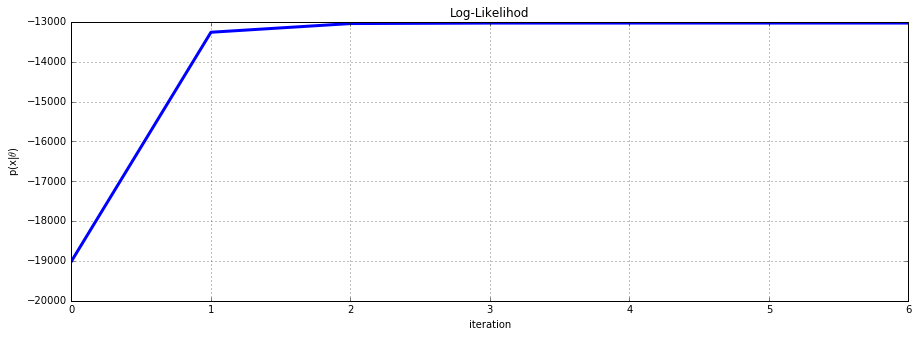

In [55]:
_,ax = plt.subplots(figsize=(15,5))
ax.plot(lca.ll_[1:], linewidth=3)
ax.set_title("Log-Likelihod")
ax.set_xlabel("iteration")
ax.set_ylabel(r"p(x|$\theta$)")
ax.grid(True)

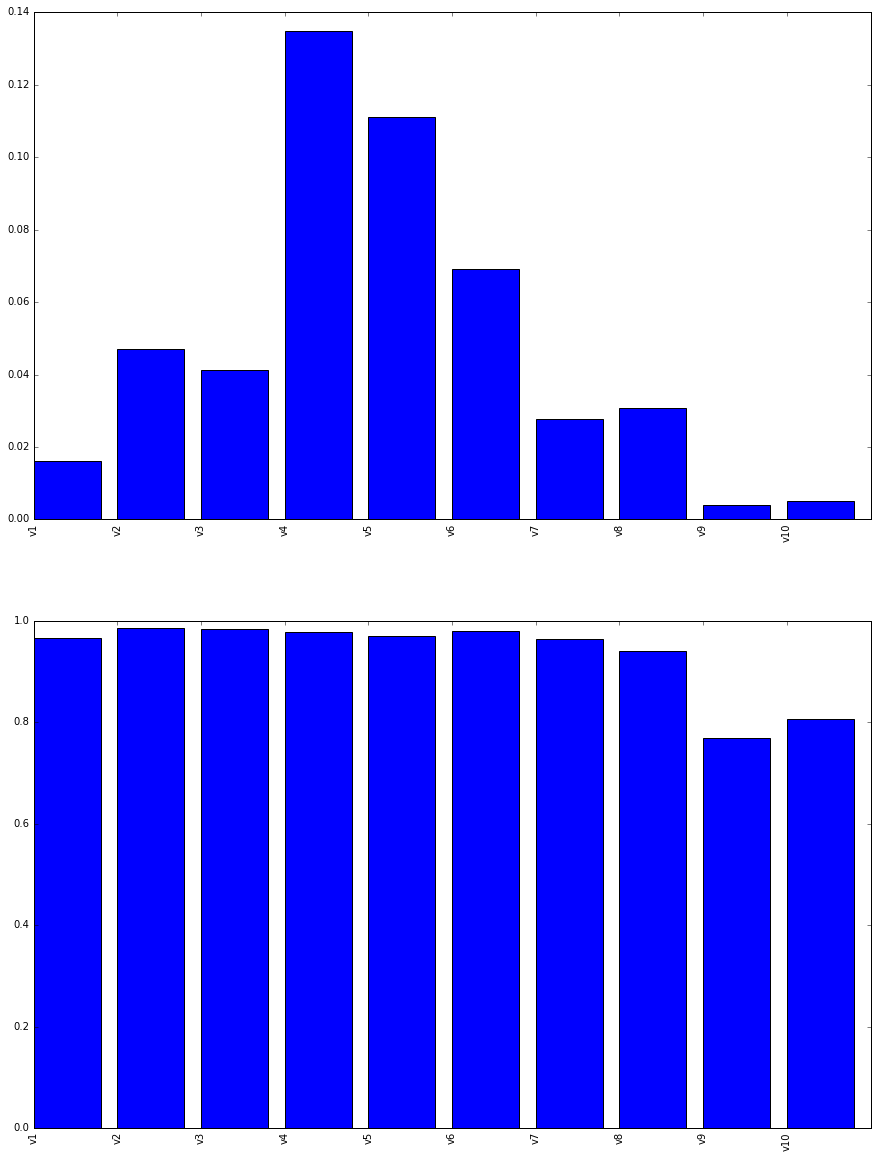

In [56]:
columns = ['v1','v2', 'v3','v4','v5', 'v6','v7', 'v8', 'v9', 'v10']
_,axs = plt.subplots(nrows=lca.theta.shape[0], figsize=(15,lca.theta.shape[0]*10))
axs = axs.ravel()
for i,ax in enumerate(axs):
    ax.bar(range(len(columns)),lca.theta[i,:])
    ax.set_xticks(range(len(columns)))
    ax.set_xticklabels(columns, rotation="vertical")

In [57]:
res = lca.predict(data)

In [58]:
res

array([0, 0, 0, ..., 0, 1, 1])

In [64]:
data_ori['label'] = res

# As a cross check - see whether the labelling agrees

In [65]:
data_ori.iloc[0:20,:]

,transientid,volunteer_1,volunteer_2,volunteer_3,volunteer_4,volunteer_5,volunteer_6,volunteer_7,volunteer_8,volunteer_9,volunteer_10,label
0,510,0,0,0,0,0,0,0,0,0,0,0
1,607,0,0,0,0,0,0,0,0,0,1,0
2,707,0,0,0,0,0,0,0,0,0,0,0
3,725,0,0,0,0,0,0,0,0,0,0,0
4,5233,1,1,1,1,1,1,1,1,1,1,1
5,5236,0,0,0,0,0,0,0,0,0,0,0
6,5402,1,1,1,1,1,1,1,1,1,1,1
7,5408,1,1,1,1,1,0,0,1,0,1,1
8,5490,0,1,1,0,1,1,1,1,0,1,1
9,5574,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data_ori.to_csv('L')

# compute bic

In [59]:
lca.bic

26182.423715994304

In [60]:
ks = [1,2]
bics = []
for k in ks:
    lca = LCA(n_components=k, tol=10e-4, max_iter=1000)
    lca.fit(data)
    bics.append(lca.bic)

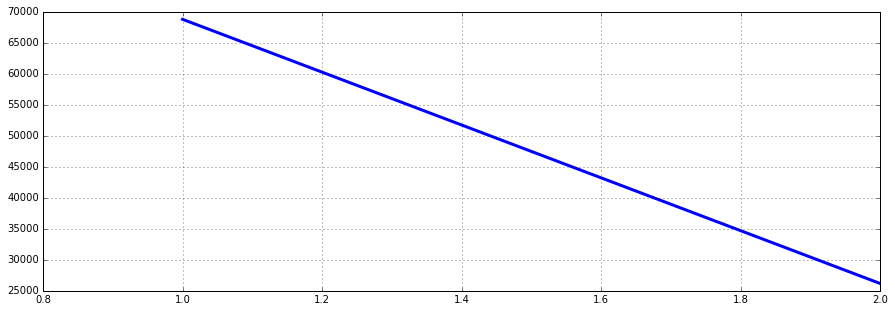

In [61]:
_,ax = plt.subplots(figsize=(15,5))
ax.plot(ks, bics, linewidth=3)
ax.grid(True)